In [1]:
# libraries we'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ignore; visualization stuff
plt.style.use('ggplot')
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [2]:
prices=pd.read_csv('/Users/bhavya/Documents/SOC2/data/JOLTEON/prices_jolteon.csv')
print(prices.head())

   timestamp  bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  \
0          0         6541           237          NaN           NaN   
1          1         6541           189          NaN           NaN   
2          2         6542            87       6541.0         111.0   
3          3         6541           234          NaN           NaN   
4          4         6540           211          NaN           NaN   

   bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  ask_price_2  \
0          NaN           NaN         6543           237          NaN   
1          NaN           NaN         6543           189          NaN   
2          NaN           NaN         6543            98       6544.0   
3          NaN           NaN         6543           234          NaN   
4          NaN           NaN         6542           211          NaN   

   ask_volume_2  ask_price_3  ask_volume_3  
0           NaN          NaN           NaN  
1           NaN          NaN           NaN  
2         1

In [3]:
print(prices["ask_price_1"].mean())
print(prices["ask_price_2"].mean())
print(prices["ask_price_3"].mean())
print(prices["bid_price_1"].mean())
print(prices["bid_price_2"].mean())
print(prices["ask_price_3"].mean())

6524.8528
6525.337733142037
nan
6523.238
6522.4236453201975
nan


In [4]:
as1=prices['ask_price_1']
as2=prices['ask_price_2']
as3=prices['ask_price_3']
ps1=prices['bid_price_1']
ps2=prices['bid_price_1']
ps3=prices['bid_price_1']
pa1=0;pa2=0;pa3=0;pb1=0;pb2=0;pb3=0
for x in range(8000,10000):
    pa1+=as1[x]
    pa2+=as2[x]
    pa3+=as3[x]
    pb1+=ps1[x]
    pb2+=ps2[x]
    pb3+=ps3[x]
print(pa1/2000)
print(pa2/2000)
print(pa3/2000)
print(pb1/2000)
print(pb2/2000)
print(pb3/2000)

6524.936
nan
nan
6523.302
6523.302
6523.302


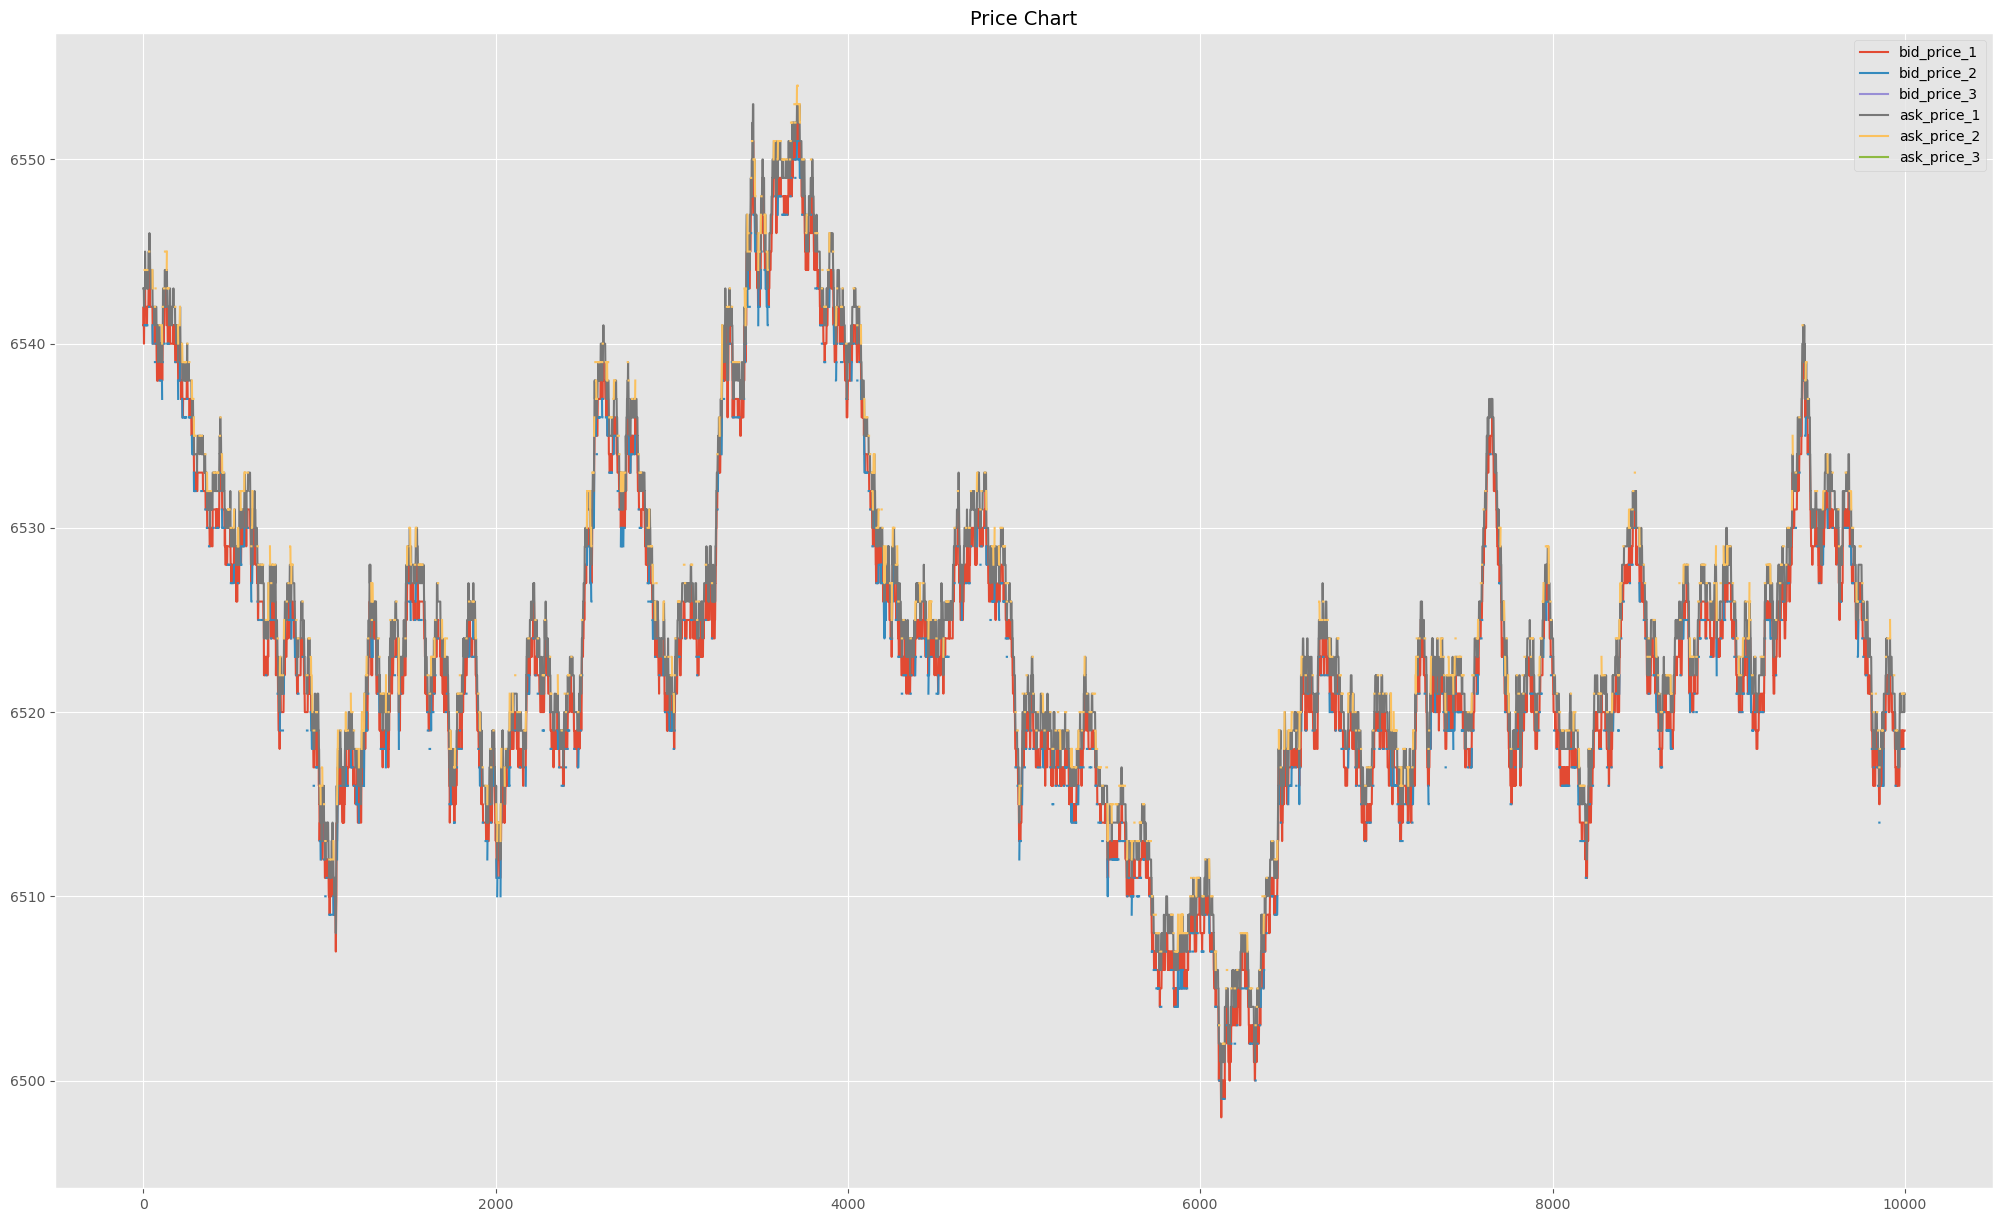

In [4]:
ts = prices['timestamp']
bp1 = prices['bid_price_1']
bp2 = prices['bid_price_2']
bp3 = prices['bid_price_3']
# bv1 = prices['bid_volume_1']
# bv2 = prices['bid_volume_2']
# bv3 = prices['bid_volume_3']
ap1 = prices['ask_price_1']
ap2 = prices['ask_price_2']
ap3 = prices['ask_price_3']
# av1 = prices['ask_volume_1']
# av2 = prices['ask_volume_2']
# av3 = prices['ask_volume_3']

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()

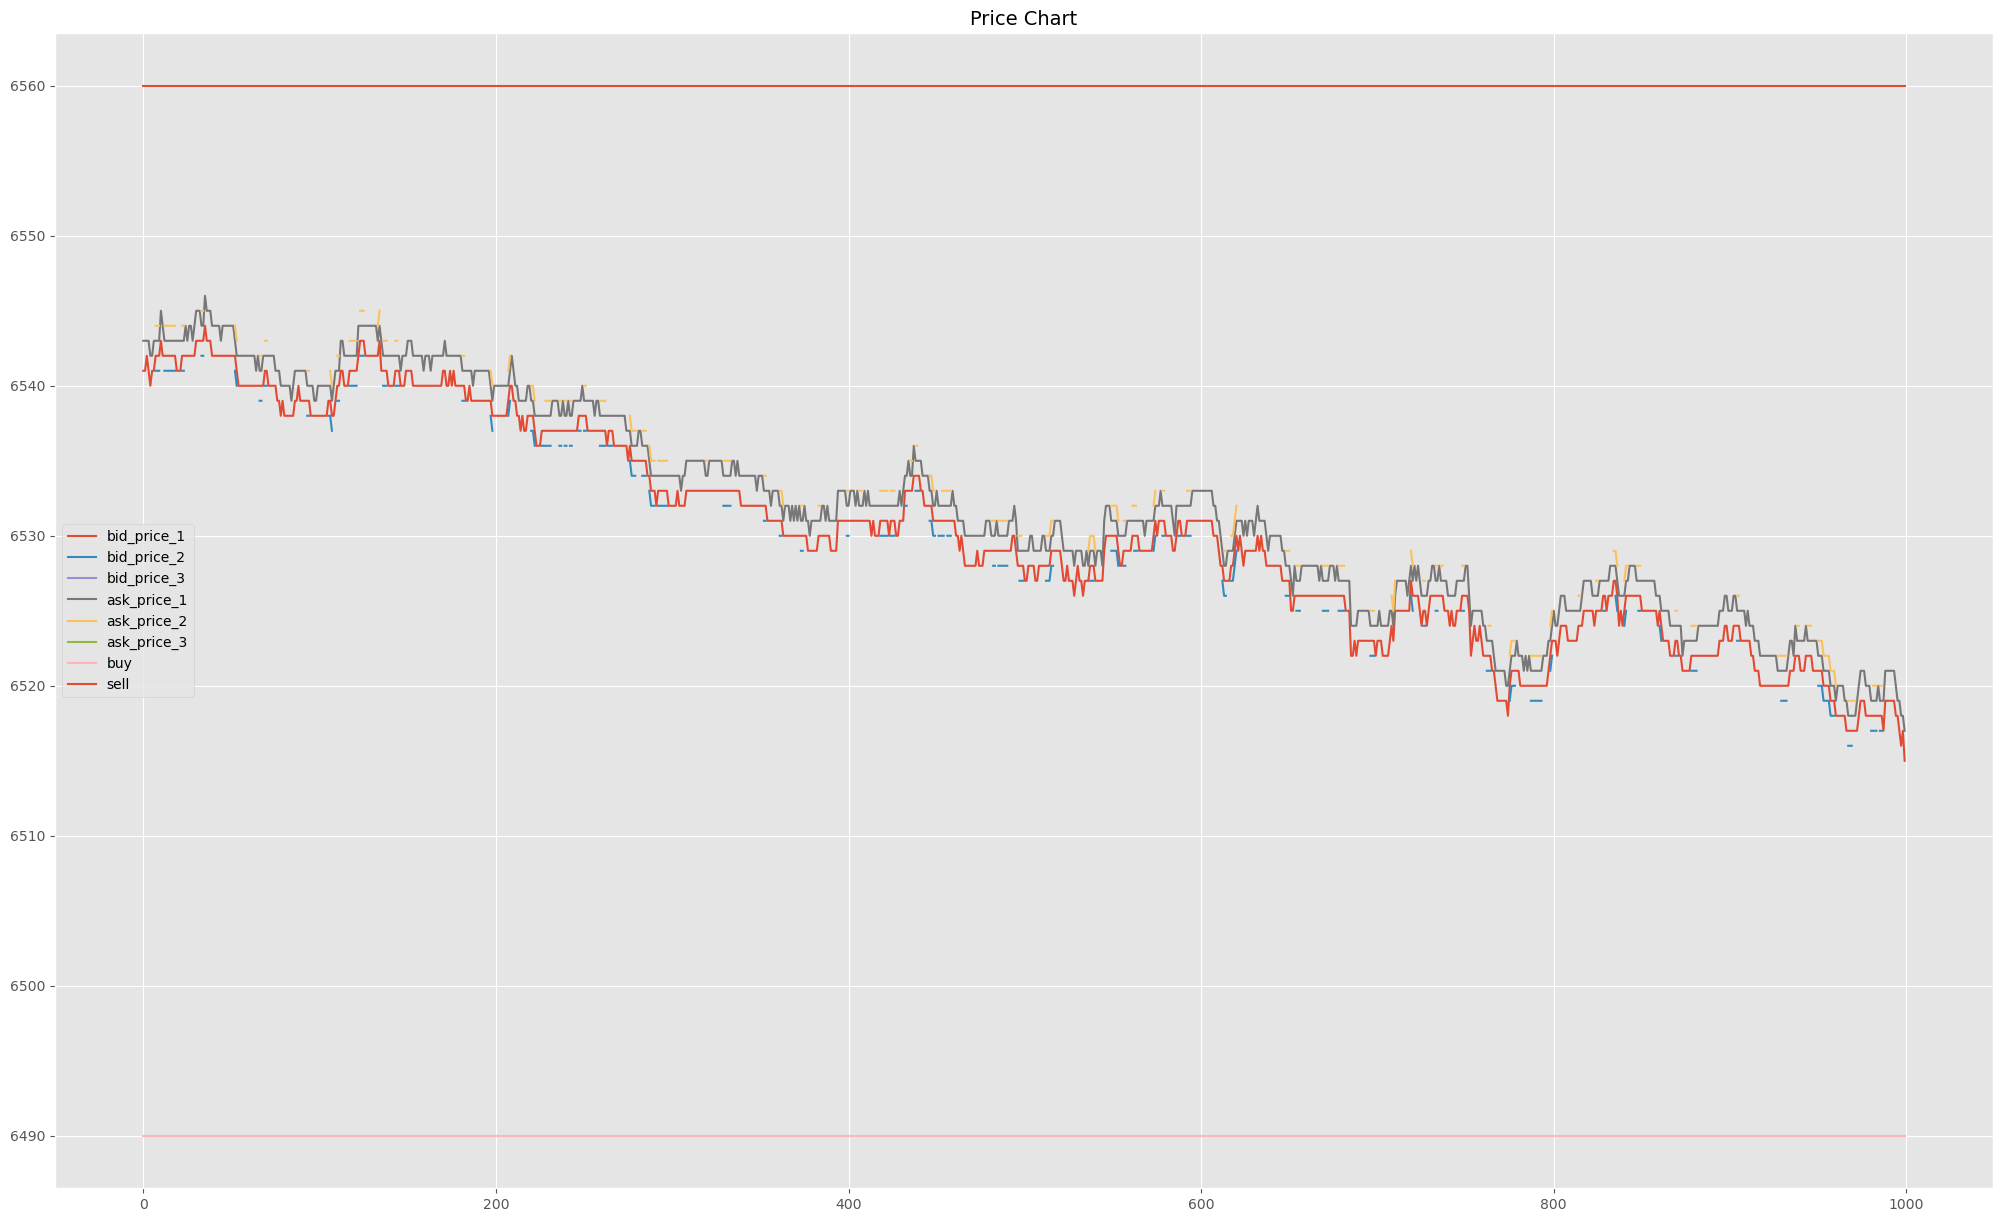

In [7]:
# slice
prices_sliced = prices[:1000]

# copy paste our previous cell and hit run
ts = prices_sliced['timestamp']
bp1 = prices_sliced['bid_price_1']
bp2 = prices_sliced['bid_price_2']
bp3 = prices_sliced['bid_price_3']
ap1 = prices_sliced['ask_price_1']
ap2 = prices_sliced['ask_price_2']
ap3 = prices_sliced['ask_price_3']

sell = np.full_like(ts, 6560)
buy = np.full_like(ts, 6490)

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
    'buy': buy,
    'sell': sell
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()

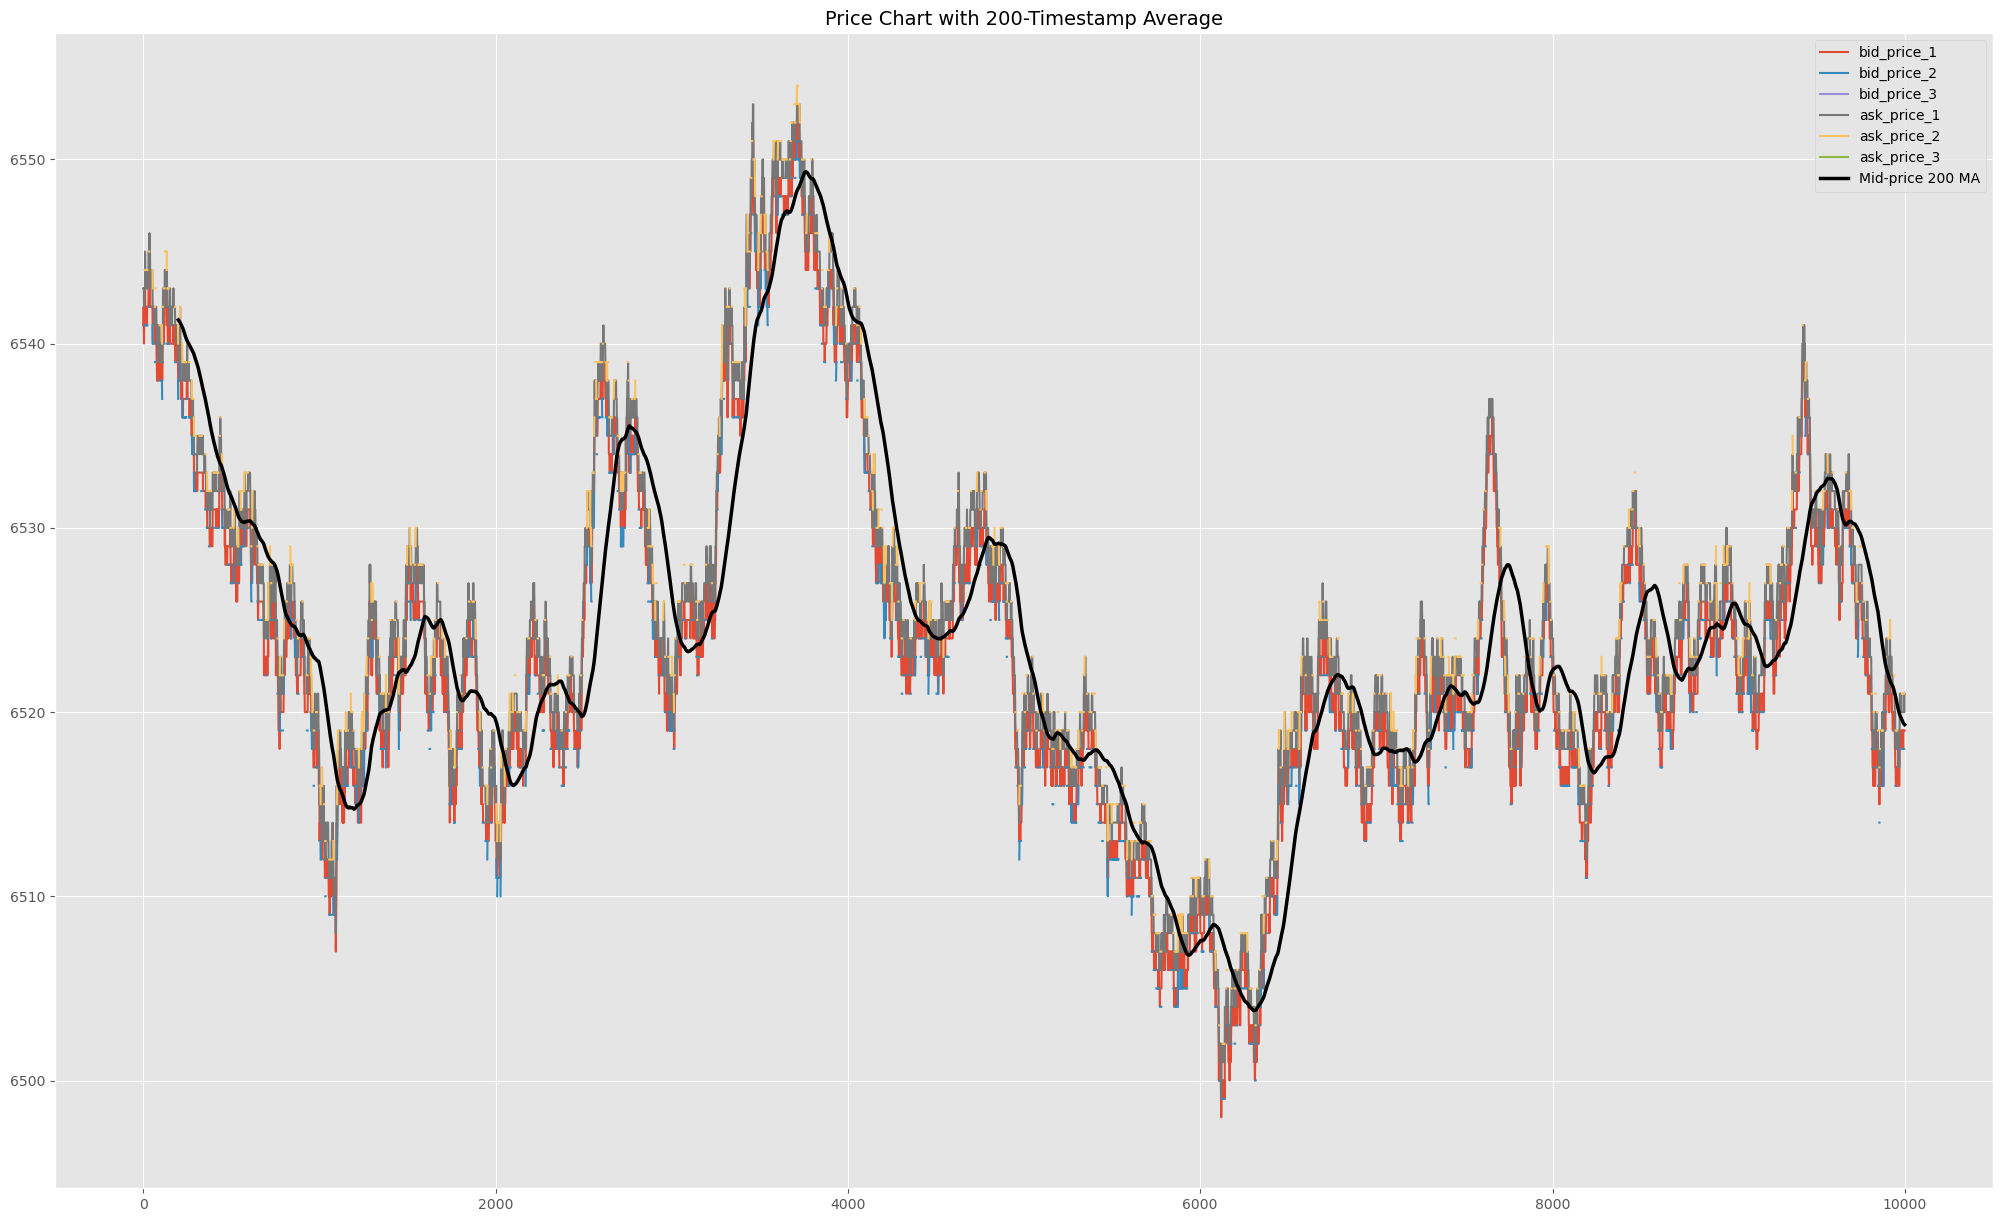

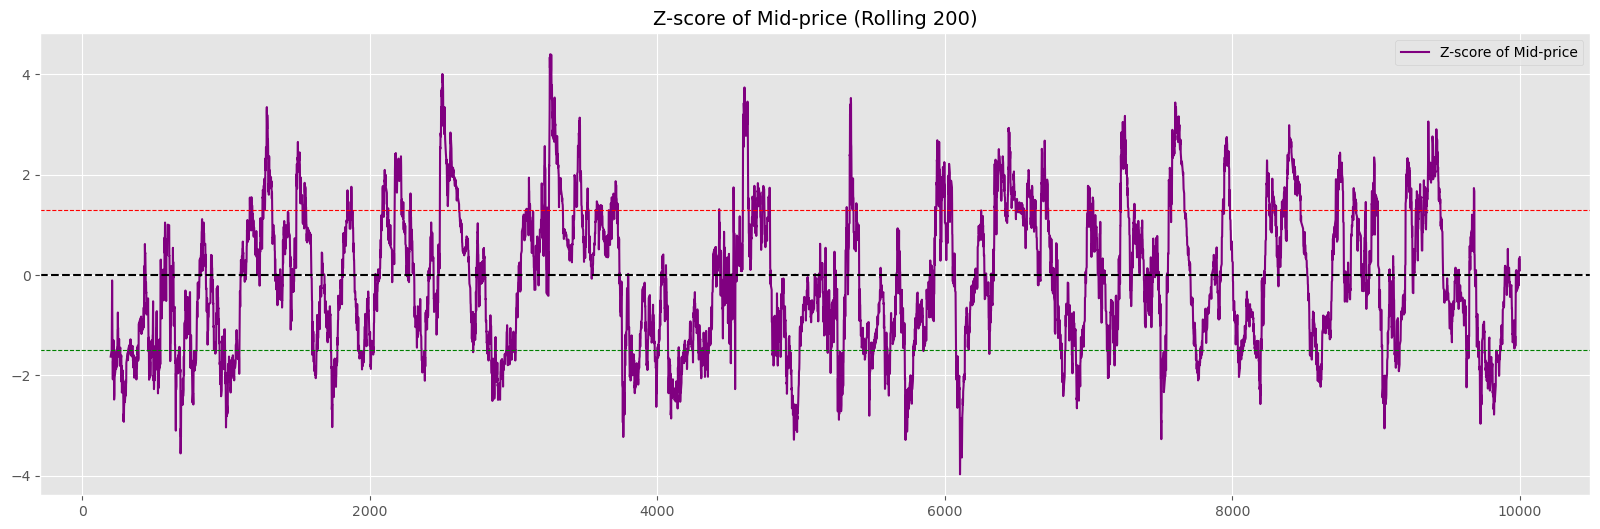

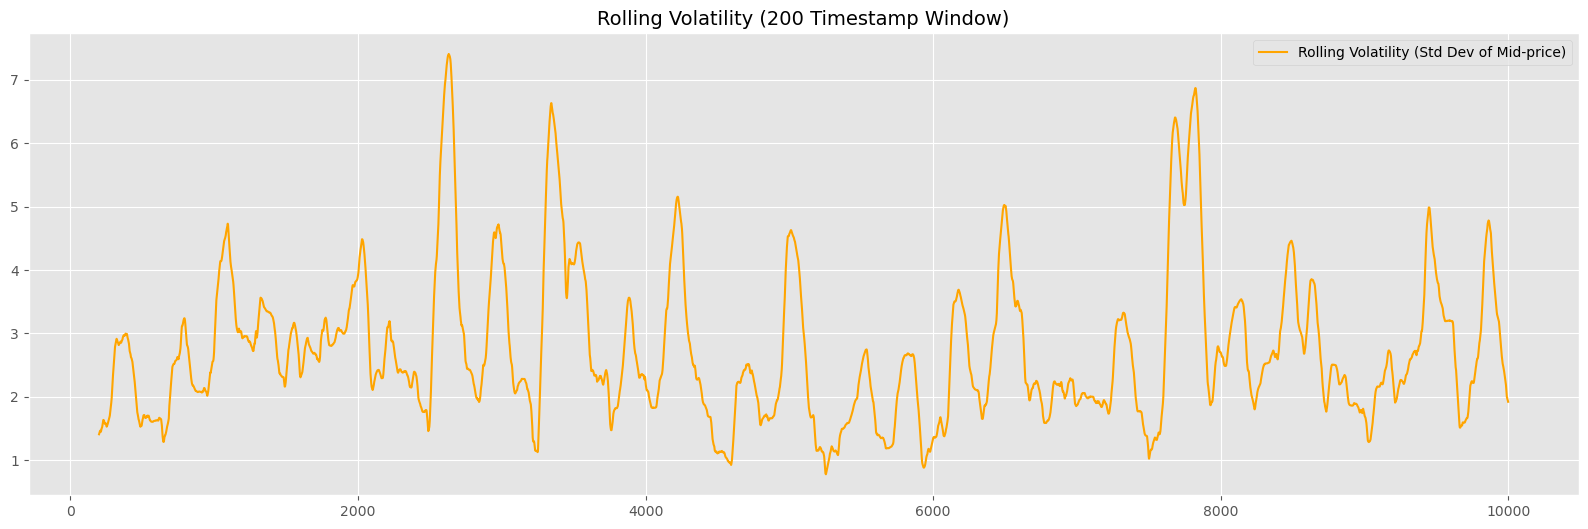

In [10]:
ts = prices['timestamp']
bp1 = prices['bid_price_1']
bp2 = prices['bid_price_2']
bp3 = prices['bid_price_3']
# bv1 = prices['bid_volume_1']
# bv2 = prices['bid_volume_2']
# bv3 = prices['bid_volume_3']
ap1 = prices['ask_price_1']
ap2 = prices['ask_price_2']
ap3 = prices['ask_price_3']
# av1 = prices['ask_volume_1']
# av2 = prices['ask_volume_2']
# av3 = prices['ask_volume_3']

mid_price = (bp1 + ap1) / 2
rolling_avg_200 = mid_price.rolling(window=200).mean()
rolling_std_200 = mid_price.rolling(window=200).std()
z_score = (mid_price - rolling_avg_200) / rolling_std_200
volatility = rolling_std_200

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)

plt.plot(ts, rolling_avg_200, label='Mid-price 200 MA', color='black', linewidth=2.5)
plt.title('Price Chart with 200-Timestamp Average')
plt.legend()
plt.show()

# Plot Z-score
plt.figure(figsize=(20, 6))
plt.plot(ts, z_score, label='Z-score of Mid-price', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1.3, color='red', linestyle='--', linewidth=0.8)
plt.axhline(-1.5, color='green', linestyle='--', linewidth=0.8)
plt.title('Z-score of Mid-price (Rolling 200)')
plt.legend()
plt.show()

# Plot Volatility
plt.figure(figsize=(20, 6))
plt.plot(ts, volatility, label='Rolling Volatility (Std Dev of Mid-price)', color='orange')
plt.title('Rolling Volatility (200 Timestamp Window)')
plt.legend()
plt.show()